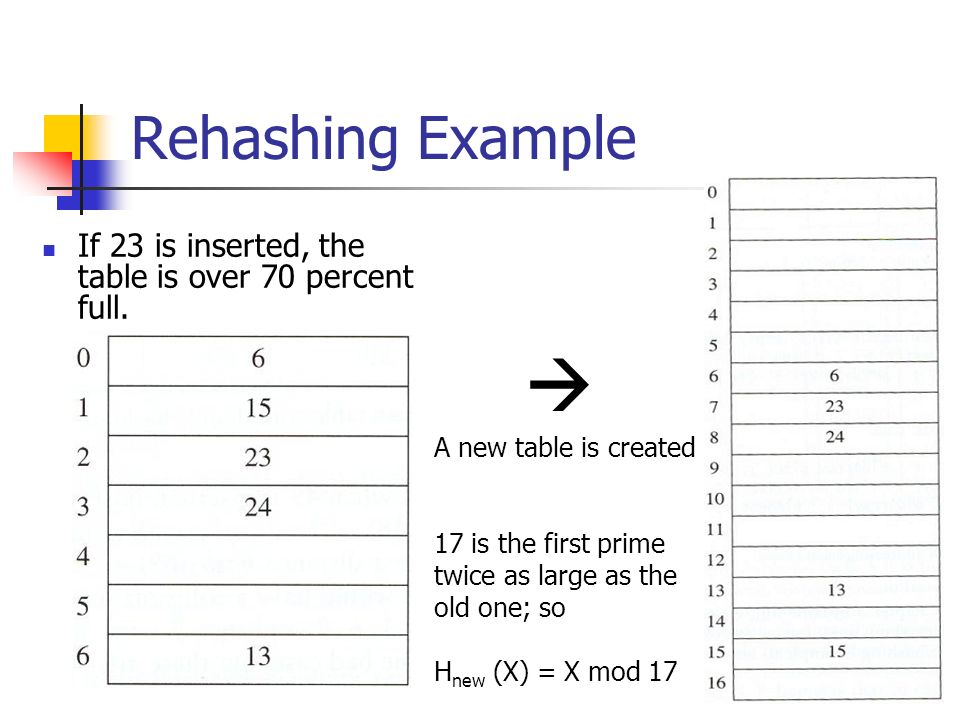

# Rehashing Code:

In [14]:
class MapNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None
        
class Map:
    def __init__(self):
        self.bucketSize = 10
        self.buckets = [None for i in range(self.bucketSize)]
        self.count = 0
        
    def size(self):
        return self.count
    
    def getBucketIndex(self,hc):
        return (abs(hc)%(self.bucketSize))
    
    def rehash(self):
        temp = self.buckets
        self.buckets = [None for i in range(2*self.bucketSize)]
        self.bucketSize = 2*self.bucketSize
        self.count = 0     # However we're increasing at the time of insertion
        
        for head in temp:
            while head is not None:
                self.insert(head.key, head.value)
                head = head.next
    
    def loadFactor(self):
        return self.count/self.bucketSize
    
    def insert(self, key, value):
        hc = hash(key)
        index = self.getBucketIndex(hc)
        head = self.buckets[index]
        while head is not None:
            if head.key == key:
                head.value = value
                return 
            head = head.next
        
        # After iterating the LL make head pointing at buckets
        head = self.buckets[index] 
        newNode = MapNode(key, value)
        newNode.next = head
        self.buckets[index] = newNode
        self.count += 1
        loadFactor = self.count/self.bucketSize    
        if loadFactor >= 0.7:
            self.rehash()
        
        
    def getValue(self, key):
        hc = hash(key)
        index = self.getBucketIndex(hc)
        head = self.buckets[index]
        while head is not None:
            if head.key == key:
                return head.value
            head = head.next
            
        return None
            
            
    def remove(self, key):
        hc = hash(key)
        index = self.getBucketIndex(hc)
        head = self.buckets[index]
        prev = None
        while head is not None:
            if head.key == key:
                
                if prev == None:
                    self.buckets[index] = head.next
                else:
                    prev.next = head.next
                    
                self.count -=1
                return head.value
            
            prev = head    
            head = head.next
            
        return None                

In [19]:
m = Map()

for i in range(10):
    m.insert('abc' + str(i), i + 1)
    print(m.loadFactor())

for i in range(10):
    print("abc" + str(i) + ":" , m.getValue('abc'+str(i)))

0.1
0.2
0.3
0.4
0.5
0.6
0.35
0.4
0.45
0.5
abc0: 1
abc1: 2
abc2: 3
abc3: 4
abc4: 5
abc5: 6
abc6: 7
abc7: 8
abc8: 9
abc9: 10
